In [1]:
%load_ext watermark
%watermark

Last updated: 2022-02-10T05:00:24.498995-03:00

Python implementation: CPython
Python version       : 3.8.12
IPython version      : 7.31.1

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
CPU cores   : 12
Architecture: 64bit



In [2]:
import warnings
warnings.filterwarnings("ignore")

# Aprendizaje No Supervisado: K-Means
- Crear un estimador k-means con un número de clusters igual al número de géneros.
- Entrenar el modelo e indicar el cluster asignado a cada película.

## Data Wrangling

Análisis y limpieza de datos:
- Búsqueda de valores `NaN` y reemplazo de valores.
- Separar columnas numéricas de categóricas.

### Lectura y análisis del dataset

In [3]:
# cargas pandas para transformar datos a dataframe y facilitar su manejo
import pandas as pd

In [4]:
# lectura del dataset y guardado en una variable tipo dataframe
df = pd.read_csv("../Ejercicios_Propios/datasets/movies_1.csv")

In [5]:
# dimensiones del dataframe
df.shape

(1344, 11)

In [6]:
# vista de las primeras 5 filas del dataset
df.head()

,presupuesto,genero,lenguaje,popularidad,productores,pais,ventas,duracion,titulo,puntuacion,n_votos
0,NaN,Comedy,en,8.387519,Sandollar Productions,United States of America,76578911.0,106.0,Father of the Bride Part II,5.7,173.0
1,NaN,Drama,en,0.894647,Miramax,South Africa,676525.0,106.0,"Cry, the Beloved Country",6.7,13.0
2,3500000.0,Comedy,en,14.569650,New Line Cinema,United States of America,28215918.0,91.0,Friday,7.0,513.0
3,NaN,Comedy,en,8.963037,Paramount Pictures,United States of America,32.0,87.0,Black Sheep,6.0,124.0
4,12000000.0,Comedy,en,9.592265,Universal Pictures,United States of America,41205099.0,92.0,Happy Gilmore,6.5,767.0


In [7]:
# descripcion del dataframe y tipos de variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   presupuesto  756 non-null    float64
 1   genero       1293 non-null   object 
 2   lenguaje     1344 non-null   object 
 3   popularidad  1344 non-null   float64
 4   productores  1135 non-null   object 
 5   pais         1246 non-null   object 
 6   ventas       1203 non-null   float64
 7   duracion     1336 non-null   float64
 8   titulo       1344 non-null   object 
 9   puntuacion   1344 non-null   float64
 10  n_votos      1344 non-null   float64
dtypes: float64(6), object(5)
memory usage: 115.6+ KB


In [8]:
# abrir columna 'genero' y observar sus categorías
df['genero'].value_counts().sort_index()

Action              29
Adventure           14
Animation           11
Comedy             453
Crime                2
Documentary        127
Drama              485
Family               3
Fantasy              2
Horror              75
Music                6
Mystery              2
Romance             10
Science Fiction     20
Thriller            26
War                  3
Western             25
Name: genero, dtype: int64

### Tratamiento de los datos categóricos faltantes

In [9]:
# separación del dataset en variables categóricas
datos_categoricos = df.select_dtypes([object])
datos_categoricos

,genero,lenguaje,productores,pais,titulo
0,Comedy,en,Sandollar Productions,United States of America,Father of the Bride Part II
1,Drama,en,Miramax,South Africa,"Cry, the Beloved Country"
2,Comedy,en,New Line Cinema,United States of America,Friday
3,Comedy,en,Paramount Pictures,United States of America,Black Sheep
4,Comedy,en,Universal Pictures,United States of America,Happy Gilmore
...,...,...,...,...,...
1339,Horror,en,La Luna Entertainment,United States of America,The Ouija Experiment 2: Theatre of Death
1340,NaN,en,NaN,NaN,Voyage to the Sky
1341,NaN,en,NaN,NaN,The Anatomy of Hate
1342,Horror,en,Campbell Grobman Films,United States of America,Leatherface


In [10]:
# identificación de los datos categóricos faltantes
datos_categoricos.isnull().sum()

genero          51
lenguaje         0
productores    209
pais            98
titulo           0
dtype: int64

In [11]:
# contar cantidad de categorías en columnas con datos faltantes
print('Número de categorías en "genero": {}'.format(len(df['genero'].unique())))
print('Número de categorías en "productores": {}'.format(len(df['productores'].unique())))
print('Número de categorías en "pais": {}'.format(len(df['pais'].unique())))

Número de categorías en "genero": 18
Número de categorías en "productores": 610
Número de categorías en "pais": 38


In [12]:
# importar librería numpy 
import numpy as np

In [13]:
# Función que imputa 'unknown' a los valores 'NaN' presentes en las columnas categóricas
def nan_categoricos(data_frame,nombre_columna):
    data_frame[nombre_columna]=np.where(data_frame[nombre_columna].isnull(),
                                        "Unknown",data_frame[nombre_columna])

In [14]:
# Utilizar función en columnas categóricas con valores 'NaN'
for columnas in ['genero','productores','pais']:
    nan_categoricos(datos_categoricos, columnas)

In [15]:
# comprobar que los valores 'NaN' en columnas categóricas ya no están presentes
datos_categoricos.isnull().sum()

genero         0
lenguaje       0
productores    0
pais           0
titulo         0
dtype: int64

### Tratamiento de los datos numéricos faltantes¶

In [16]:
# separación del dataset en variables numéricas
datos_numericos = df.select_dtypes([int, float])
datos_numericos

,presupuesto,popularidad,ventas,duracion,puntuacion,n_votos
0,NaN,8.387519,76578911.0,106.0,5.7,173.0
1,NaN,0.894647,676525.0,106.0,6.7,13.0
2,3500000.0,14.569650,28215918.0,91.0,7.0,513.0
3,NaN,8.963037,32.0,87.0,6.0,124.0
4,12000000.0,9.592265,41205099.0,92.0,6.5,767.0
...,...,...,...,...,...,...
1339,NaN,1.642247,NaN,86.0,3.0,25.0
1340,NaN,0.352816,NaN,11.0,5.5,2.0
1341,NaN,0.110588,NaN,86.0,5.7,3.0
1342,NaN,9.742082,NaN,90.0,5.7,62.0


In [17]:
# dimensiones de los datos numéricos
datos_numericos.shape

(1344, 6)

In [18]:
# identificación de los datos numéricos faltantes
datos_numericos.isnull().sum()

presupuesto    588
popularidad      0
ventas         141
duracion         8
puntuacion       0
n_votos          0
dtype: int64

In [19]:
# reemplazar datos numéricos faltantes con el valor medio
for col in datos_numericos.columns:
    datos_numericos[col].fillna(datos_numericos[col].mean(), inplace=True)

In [20]:
datos_numericos.isnull().sum()

presupuesto    0
popularidad    0
ventas         0
duracion       0
puntuacion     0
n_votos        0
dtype: int64

### Escalado de los datos numéricos

In [21]:
# importar librería para normalizar los datos numéricos
from sklearn.preprocessing import MinMaxScaler

In [22]:
datos_numericos_normalizados = MinMaxScaler().fit_transform(datos_numericos)
datos_numericos_normalizados = pd.DataFrame(
    datos_numericos_normalizados, columns=datos_numericos.columns)
datos_numericos_normalizados

,presupuesto,popularidad,ventas,duracion,puntuacion,n_votos
0,0.099359,0.130437,1.251495e-01,0.475336,0.600000,0.035810
1,0.099359,0.013907,1.105613e-03,0.475336,0.705263,0.002691
2,0.019663,0.226583,4.611202e-02,0.408072,0.736842,0.106189
3,0.099359,0.139388,5.066192e-08,0.390135,0.631579,0.025668
4,0.067416,0.149174,6.733966e-02,0.412556,0.684211,0.158766
...,...,...,...,...,...,...
1339,0.099359,0.025533,5.874633e-02,0.385650,0.315789,0.005175
1340,0.099359,0.005480,5.874633e-02,0.049327,0.578947,0.000414
1341,0.099359,0.001713,5.874633e-02,0.385650,0.600000,0.000621
1342,0.099359,0.151504,5.874633e-02,0.403587,0.600000,0.012834


### Codificado de las variables categóricas y eliminación de columna `titulo`

In [23]:
# codificar las variables categoricas con `get_dummies`
datos_categoricos_codificados = pd.get_dummies(datos_categoricos)
datos_categoricos_codificados.shape

(1344, 2024)

In [24]:
# se observa que la variable 'titulo' no añade valor al análisis ('categorías' no se repiten)
datos_categoricos = datos_categoricos.drop(columns=['titulo'])

In [25]:
# codificar las variables categoricas, esta vez, sin la columna 'titulo'
# gracias a esta acción, baja la cantidad de columnas generadas con el método 'get_dummies'
datos_categoricos_codificados = pd.get_dummies(datos_categoricos)
datos_categoricos_codificados

,genero_Action,genero_Adventure,genero_Animation,genero_Comedy,genero_Crime,genero_Documentary,genero_Drama,genero_Family,genero_Fantasy,genero_Horror,...,pais_Spain,pais_Sri Lanka,pais_Sweden,pais_Switzerland,pais_Taiwan,pais_Thailand,pais_Turkey,pais_United Kingdom,pais_United States of America,pais_Unknown
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1340,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1342,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


### Concatenar datos numéricos y categóricos

In [26]:
# concatenar dataset numérico y categórico
df_procesado = pd.concat([datos_numericos_normalizados,
                                 datos_categoricos_codificados],
                                 axis=1)
df_procesado.shape

(1344, 701)

## K-Means

### Creación y entrenamiento del modelo K-Means

In [27]:
# importar K-Means
from sklearn.cluster import KMeans
# crear el modelo
estimador_kmedias = KMeans(n_clusters=len(df['genero'].unique()), random_state=40)
# entrenar el modelo
estimador_kmedias.fit(df_procesado)

KMeans(n_clusters=18, random_state=40)

### Asignación de etiquetas para identificar cada cluster

In [28]:
# Asignar etiquetas a cada cluster creado
label_clusters = estimador_kmedias.labels_
label_clusters

array([14,  0, 14, ...,  4,  5,  9])

### Creación de funciones para la obtención de tabla resumen y comparación de clusters

In [29]:
# mostrar un resumen de los valores de las variables de cada cluster
def r_cluster(cluster_id):
    cluster = df[label_clusters == cluster_id]
    # a los valores categóricos asignamos la moda
    resumen_cluster = cluster[datos_categoricos.columns].mode().to_dict(orient='records')[0]
    # a los valores numéricos asignamos la media
    resumen_cluster.update(cluster.mean().to_dict())
    resumen_cluster["cluster_id"] = cluster_id
    return resumen_cluster

In [30]:
# comparación de clusters
def comparar_clusters(*cluster_ids):
    resumenes = []
    for clus_id in cluster_ids:
        resumenes.append(r_cluster(clus_id))
    return pd.DataFrame(resumenes).set_index('cluster_id').T

In [31]:
# data frame comparativo de clusters
comparar_clusters(*np.unique(label_clusters))

cluster_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
genero,Drama,Comedy,Documentary,Comedy,Documentary,Horror,Drama,Comedy,Comedy,Comedy,Drama,Comedy,Western,Comedy,Comedy,Drama,Thriller,Drama
lenguaje,en,en,en,ru,en,en,en,es,en,it,fr,pt,en,de,en,hi,en,en
productores,Téléfilm Canada,Twentieth Century Fox Film Corporation,Diamond Docs,Bazelevs Production,Warren Miller Entertainment,New Line Cinema,Warner Bros.,Televisión Española (TVE),BBC Films,Colorado Film Production,France 2 Cinéma,Globo Filmes,Paramount Pictures,Constantin Film,Paramount Pictures,Tokyo Broadcasting System (TBS),Paramount Pictures,NaN
pais,Canada,United States of America,United States of America,Russia,Canada,United States of America,United States of America,Spain,United Kingdom,Italy,France,Brazil,United States of America,Germany,United States of America,India,United States of America,United States of America
presupuesto,7484841.8,48967741.935484,2954332.235294,4382500.272727,2390869.678571,7489324.074074,17530291.386667,9155000.0,6700524.882353,5181438.181818,10851073.263158,115000.0,9044413.071429,4448873.666667,23075152.70936,5904145.526316,29601033.898305,4410083.333333
popularidad,4.374801,9.464138,2.97794,0.856239,0.735512,8.795409,7.515568,2.781735,4.9814,3.487536,4.427082,1.464727,8.350495,2.640673,7.572001,3.899903,7.387585,1.542162
ventas,3234679.809524,115384437.868421,4919146.72,5072575.190476,1863109.283582,39225021.688525,42908862.640777,3476822.5,18090128.610169,11878433.333333,11080947.777778,25433850.571429,20479043.636364,19626218.555556,53250587.513986,21906154.622642,48225573.986111,2312582.368421
duracion,111.136364,102.0,92.0,94.666667,88.809091,93.692308,113.943218,92.826087,97.128571,78.047619,106.588235,94.384615,111.958333,89.923077,96.722973,122.728814,99.948718,90.259259
puntuacion,6.586364,5.8,6.421176,5.241667,5.112613,5.598462,6.53123,5.284615,6.108571,5.954545,6.311765,6.053846,6.366667,5.826667,5.848649,6.775,5.842308,5.611111
n_votos,101.5,777.184211,56.964706,8.5,6.099099,408.307692,370.725552,36.576923,119.614286,103.772727,100.078431,23.307692,220.583333,71.266667,385.918919,73.183333,315.307692,10.407407


### Obtener etiqueta del cluster para cada película

In [32]:
# Copia del dataset original
df_cluster = df.copy()
# Se eliminan todas las columnas a excepción de `titulo`
df_cluster.drop(df_cluster.columns.difference(['titulo']),1,inplace=True)
# Se añade una columna con la etiqueta de cada cluster
df_cluster['cluster'] = label_clusters
# Para efectos prácticos, se muestra un solo cluster (cluster 0)
df_cluster[df_cluster.cluster == 0]

,titulo,cluster
1,"Cry, the Beloved Country",0
21,Once Were Warriors,0
94,The Sweet Hereafter,0
165,Head On,0
394,Proof,0
405,The Company,0
417,Dance Me Outside,0
555,Romanzo criminale,0
596,Julia,0
609,The Tracey Fragments,0


## Evaluación del modelo

In [33]:
# iportar librerías para la visualización de los datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

### Método del Codo

In [34]:
# WCSS (Within-Cluster Sum of Square)
# WCSS: suma de la distancia al cuadrado entre cada punto y el centroide del cluster
wcss=[]

# buscar el WCSS para cada valor de 'K' entre 1 y 50
for i in range(1,51):
    # "init='k-means++'" es un método de inicialización de los centroides,
    # que es más rápido y provee una mejor performance al modelo.
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(df_procesado)
    wcss.append(kmeans.inertia_)

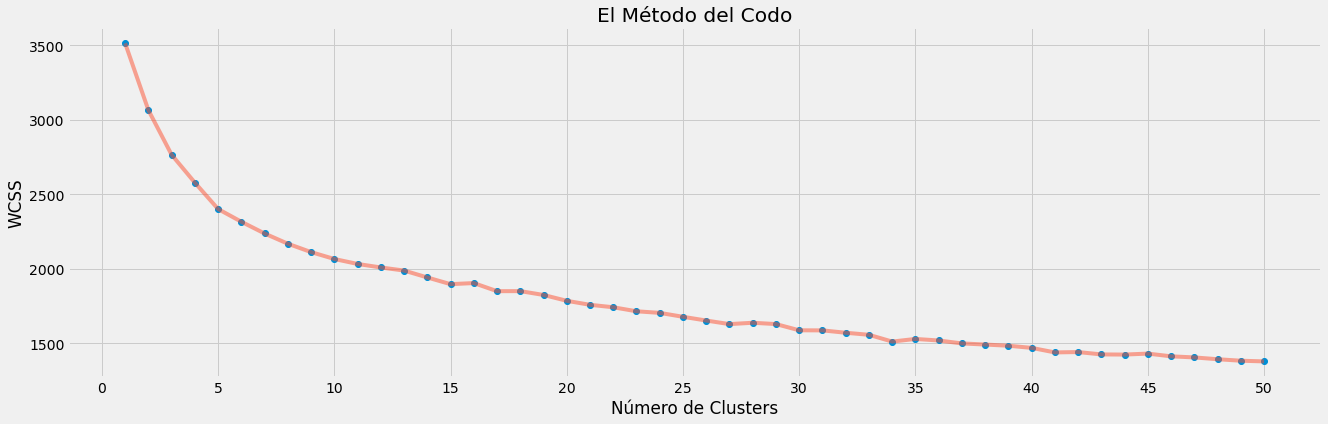

In [35]:
# Visualización del método del codo, para obtener el mejor valor de 'K'
plt.figure(figsize=(20,6))
plt.plot(np.arange(1 , 51) , wcss , 'o')
plt.plot(np.arange(1 , 51) , wcss , '-' , alpha = 0.5)
plt.title('El Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(0, 51, step=5))
plt.grid(True)
plt.show()

- A simple vista podría señalarse que los valores óptimos para 'K' oscilarían entre 5 y 10, que es la zona en donde se observa el codo.
- Dado que en esa zona no se encuentra el 'K' sugerido (18, que es el número de categorías de la columna `genero`), para el próximo análisis se considera evaluar el rango de valores para 'K' entre 5 y 18.

### Análisis de Silueta

- El análisis de silueta se puede utilizar para estudiar la distancia de separación entre los clusters resultantes. El gráfico de silueta muestra una medida de qué tan cerca está cada punto en un grupo de puntos en los clusters vecinos y, por lo tanto, proporciona una forma de evaluar parámetros como el número de clusters visualmente. Esta medida tiene un rango de [-1, 1].


- Los coeficientes de silueta (como se denominan estos valores) cercanos a +1 indican que la muestra está lejos de los clusters vecinos. Un valor de 0 indica que la muestra está en o muy cerca del límite de decisión entre dos clusters vecinos y los valores negativos indican que esas muestras pueden haber sido asignadas al cluster equivocado.

In [36]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

Para n_clusters = 5, el coeficiente de silueta es 0.1721)
Para n_clusters = 6, el coeficiente de silueta es 0.1832)
Para n_clusters = 7, el coeficiente de silueta es 0.1861)
Para n_clusters = 8, el coeficiente de silueta es 0.1909)
Para n_clusters = 9, el coeficiente de silueta es 0.198)
Para n_clusters = 10, el coeficiente de silueta es 0.2076)
Para n_clusters = 11, el coeficiente de silueta es 0.2049)
Para n_clusters = 12, el coeficiente de silueta es 0.2065)
Para n_clusters = 13, el coeficiente de silueta es 0.1484)
Para n_clusters = 14, el coeficiente de silueta es 0.1571)
Para n_clusters = 15, el coeficiente de silueta es 0.1695)
Para n_clusters = 16, el coeficiente de silueta es 0.1665)
Para n_clusters = 17, el coeficiente de silueta es 0.1724)
Para n_clusters = 18, el coeficiente de silueta es 0.1614)


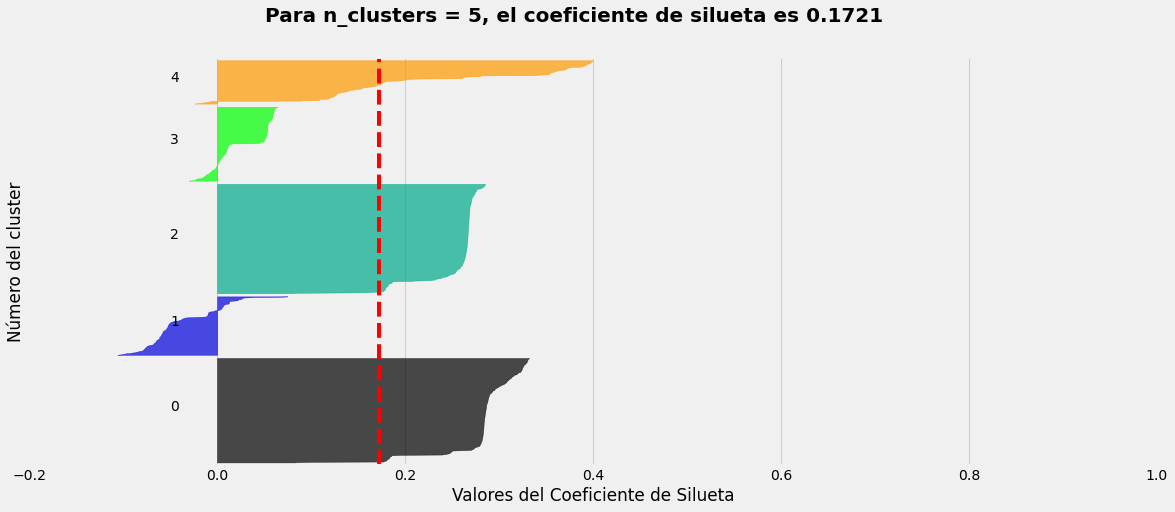

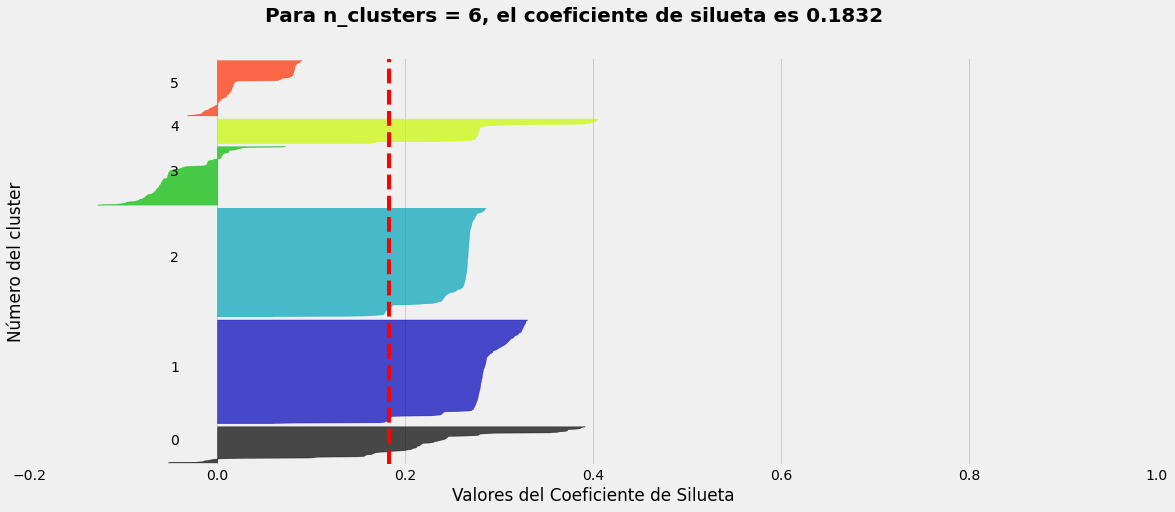

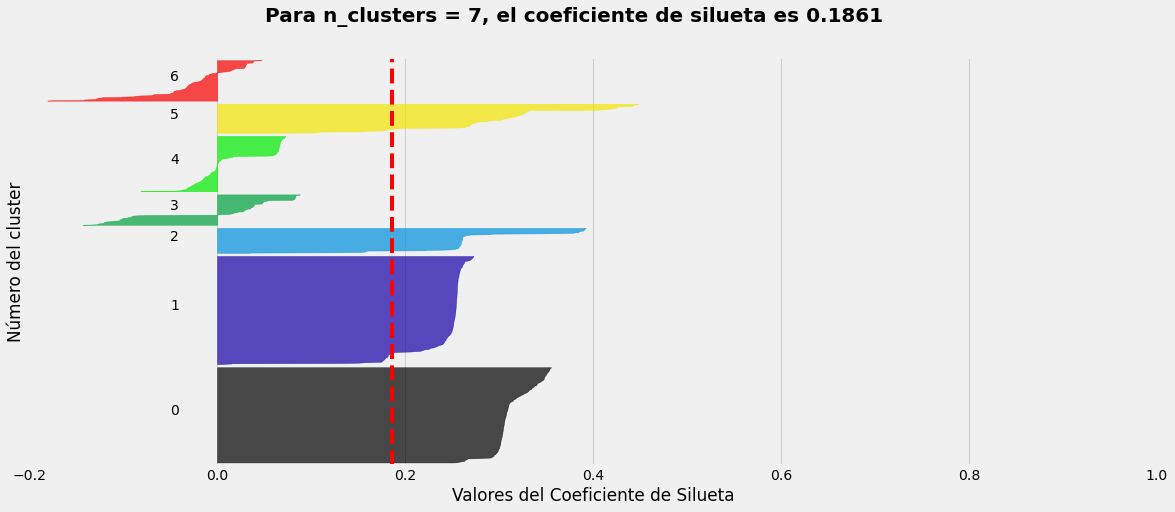

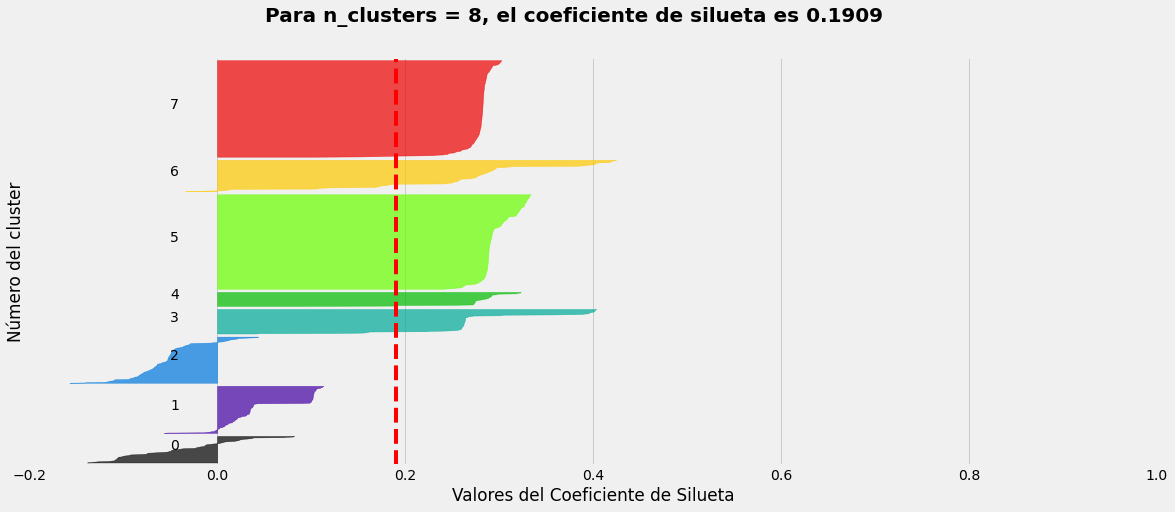

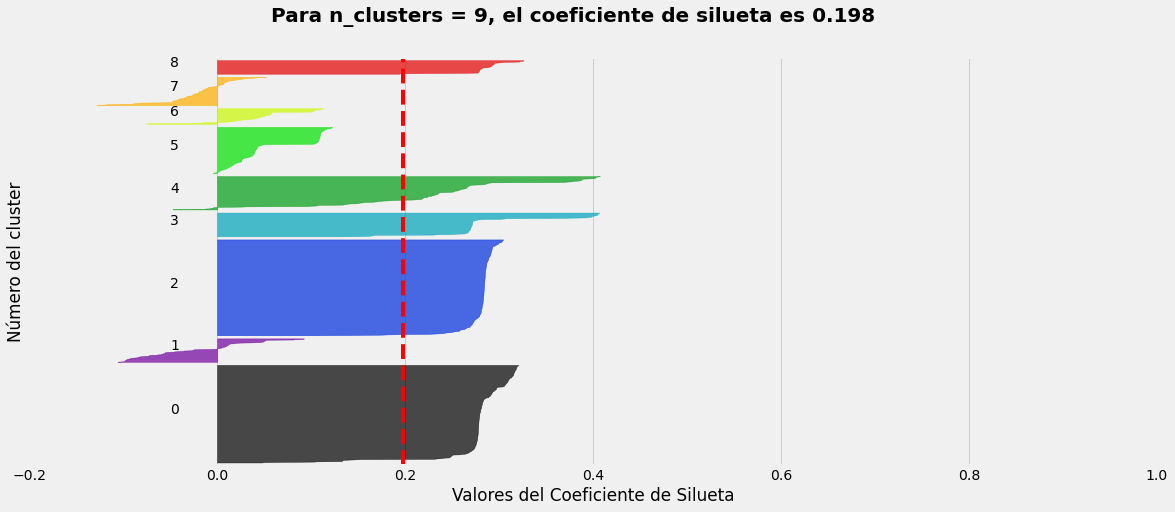

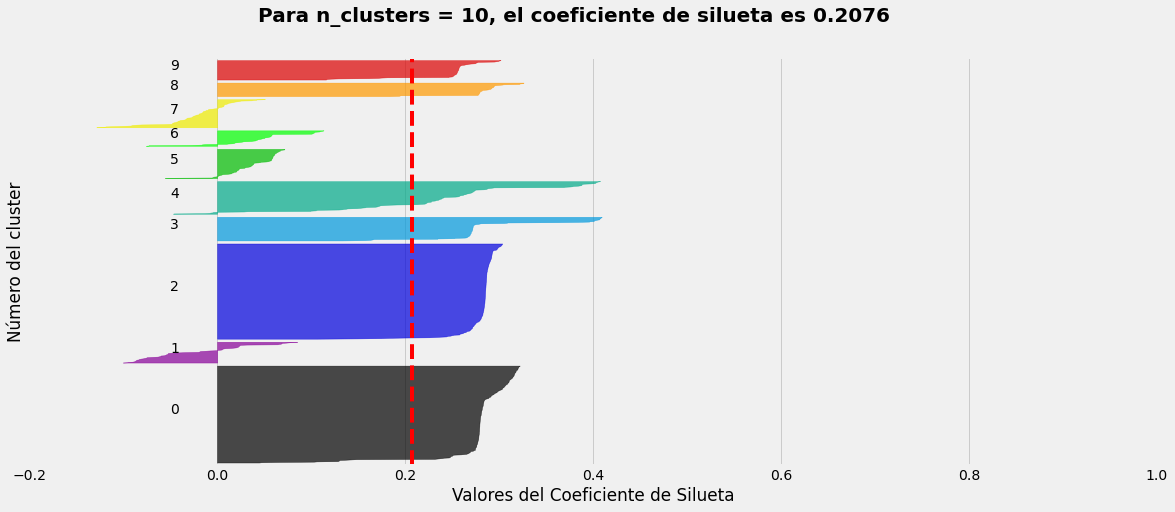

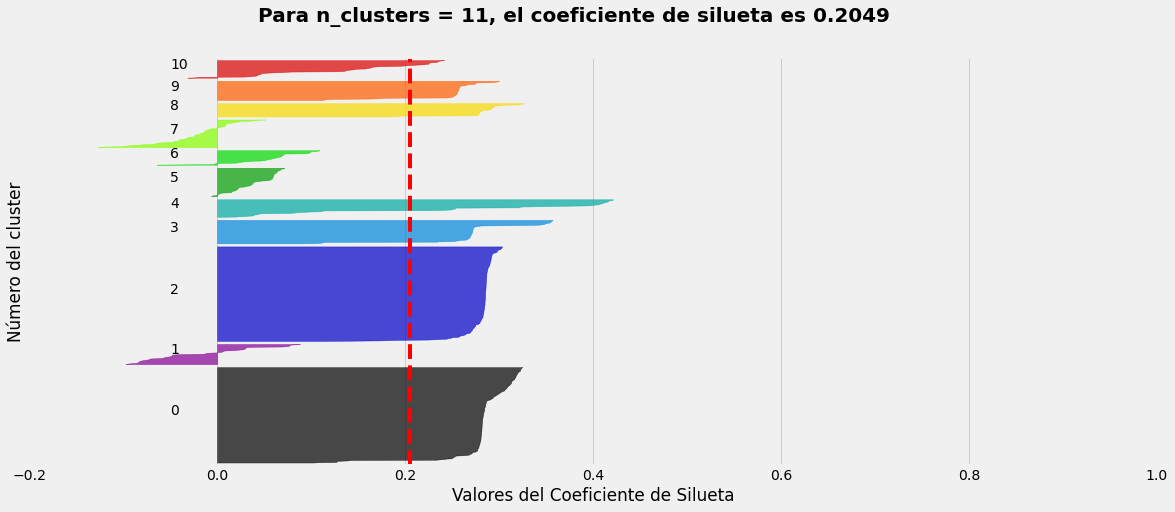

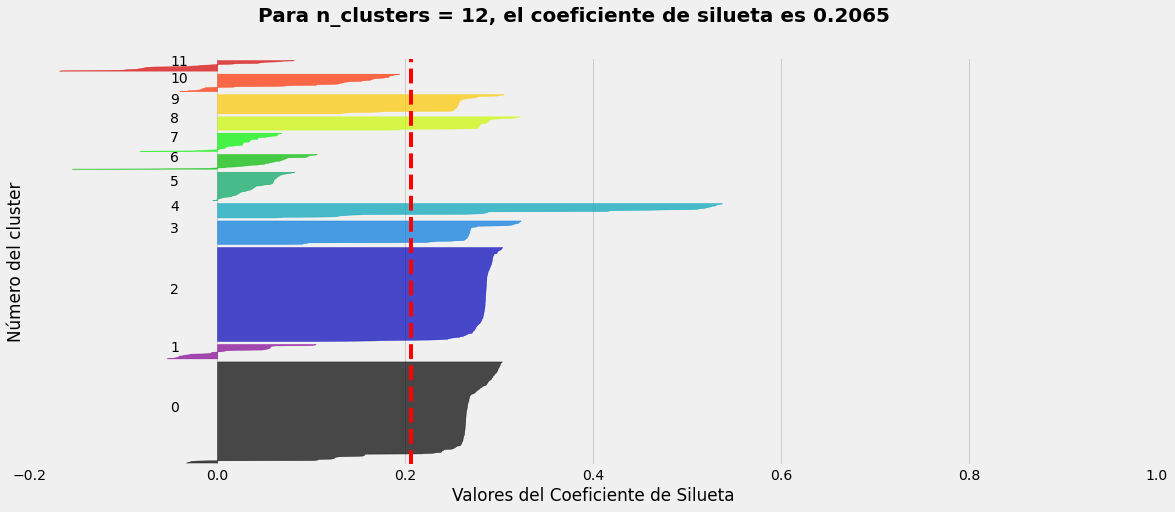

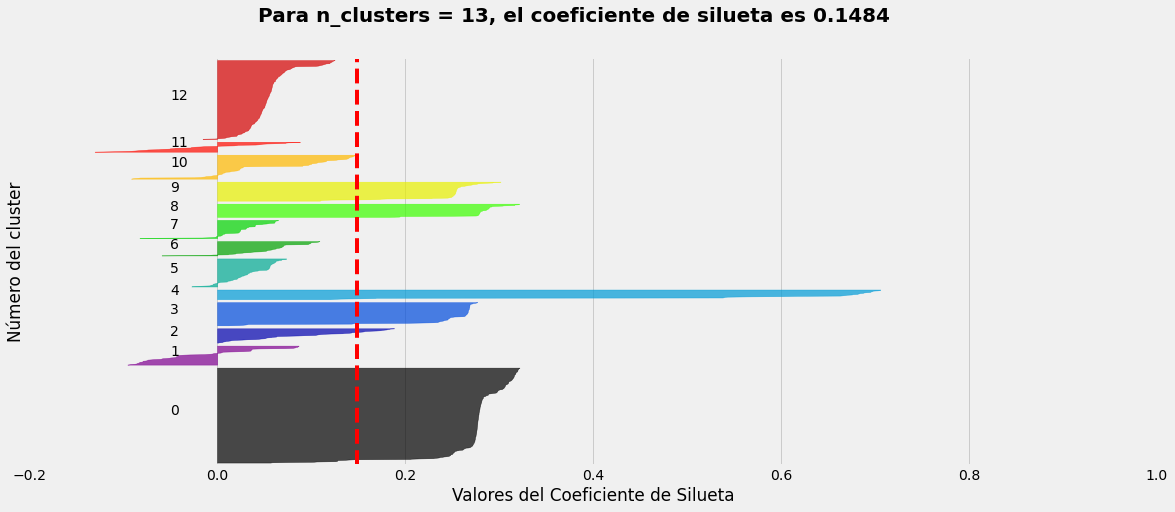

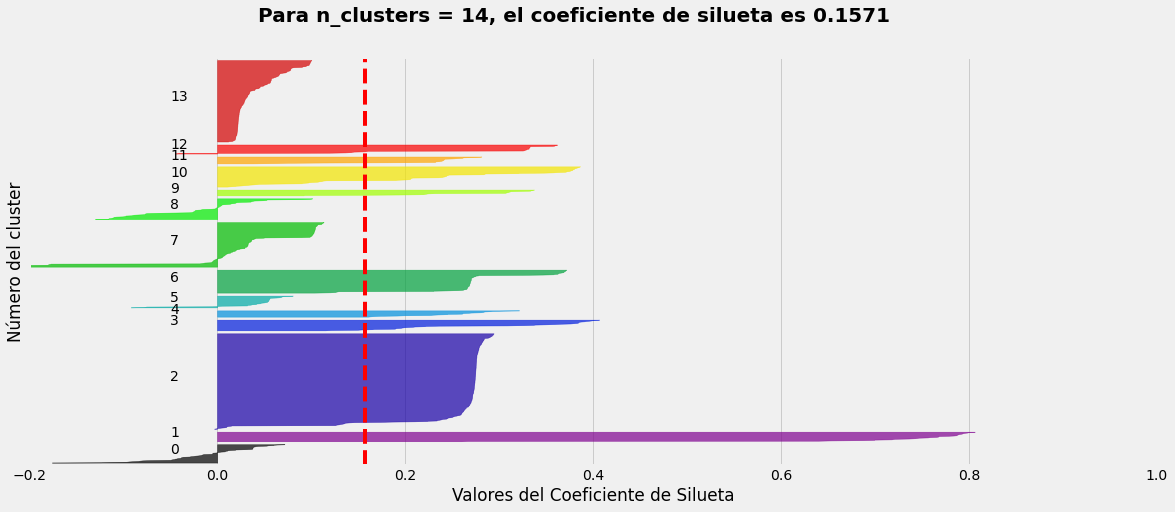

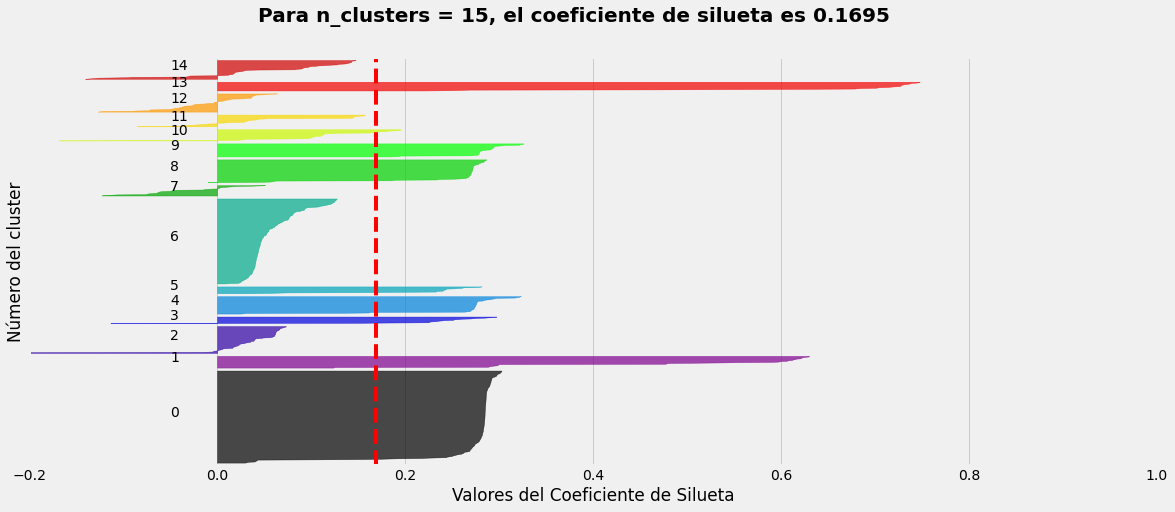

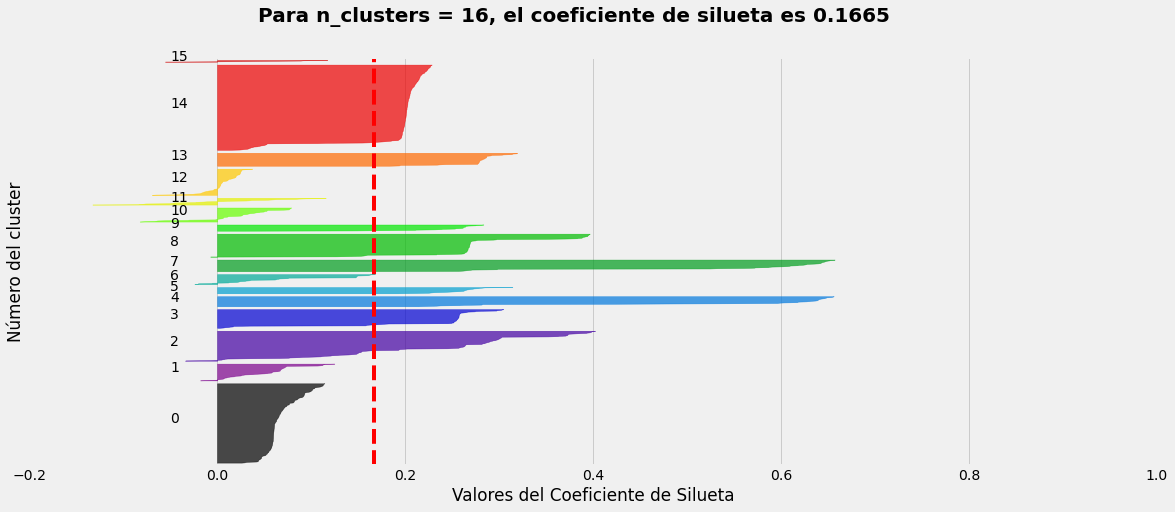

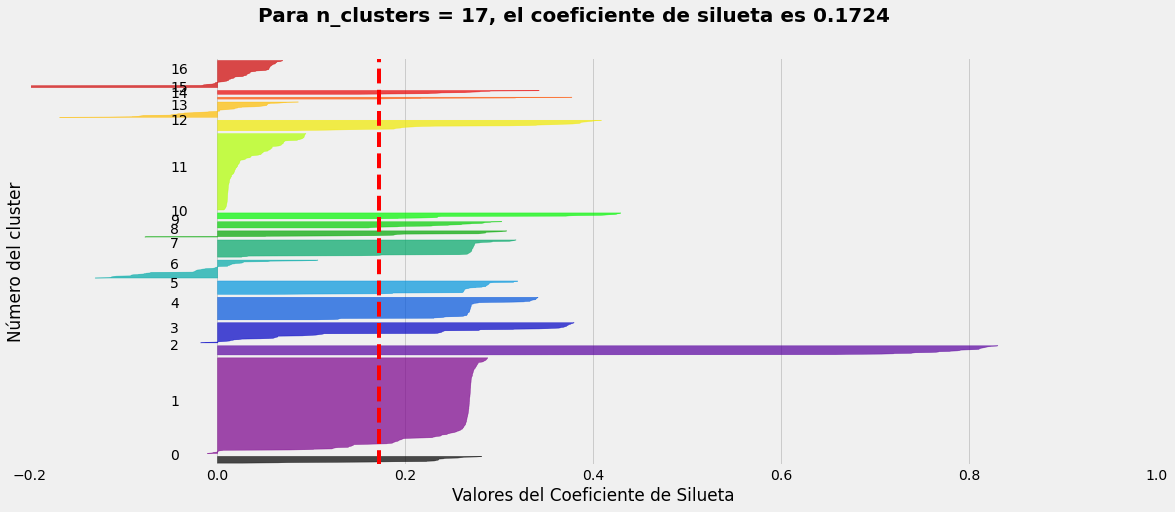

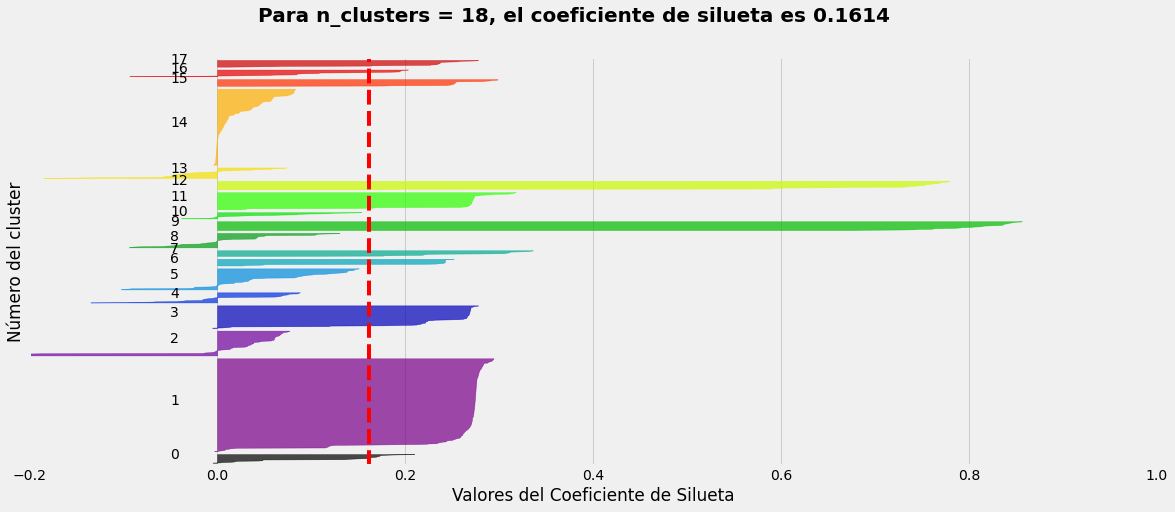

In [37]:
for n_clusters in range(5,19):
################################################################################################    
    # todo el código para la creación del gráfico de silueta fue extraído desde 
    # la documentación oficial de Scikit-learn y adaptado a este dataset
################################################################################################
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    # El coeficiente de silueta varía entre -1 y 1 pero en este ejercicio 
    # el rango mostrado será [-0.2, 1]
    ax1.set_xlim([-0.2, 1])
    # '(n_clusters+1)*10' se usa para insertar espacios vacíos entre los gráficos
    # de silueta de los clusters individuales, para demarcarlos claramente.
    ax1.set_ylim([0, len(df_procesado) + (n_clusters + 1) * 10])
###############################################################################################    
    # implementación de K-Means 
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', random_state=0)
    preds = clusterer.fit_predict(df_procesado)
    centers = clusterer.cluster_centers_
    score = silhouette_score(df_procesado, preds)
    print("Para n_clusters = {}, el coeficiente de silueta es {})".format(n_clusters, round(score,4)))    
##############################################################################################
    # Computar los puntajes de silueta por cada muestra
    sample_silhouette_values = silhouette_samples(df_procesado, preds)

    y_lower = 10
    for i in range(n_clusters):
        # Agregar los puntajes de silueta para muestras pertenecientes al
        # cluster i, y ordenarlas
        ith_cluster_silhouette_values = sample_silhouette_values[preds == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Etiqueta de los gráficos de silueta con sus números de clsuter al medio
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Computar el nuevo y_lower para el siguiente gráfico
        y_lower = y_upper + 10 

    ax1.set_xlabel("Valores del Coeficiente de Silueta")
    ax1.set_ylabel("Número del cluster")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=score, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    plt.suptitle(
        "Para n_clusters = {}, el coeficiente de silueta es {}".format(n_clusters, round(score,4)),
        fontsize=20,
        fontweight="bold",
    )

plt.show()

## Conclusiones

- Por el método del codo se pudo determinar que el número de cluster ideal ronda entre 5 y 10, que es la zona de la gráfica en donde se produce la curva más pronunciada.
- Por el análisis del coeficiente de silueta, se concluyó que los clusters con valor de 'K' igual a 10, 11 y 12 poseen las puntuaciones más elevadas entre todos (rango analizado entre 5 y 18).
- Los puntajes más altos de silueta rondan en torno a 0.2, lo que significa que los datos se encuentran muy cerca del límite con otros clusters. 
- Se vio cómo con 18 clusters hay más valores que están mal clasificados, en comparación a 10 o 12 clusters. Esto se observa cuando en el gráfico de silueta los valores se hacen negativos. 
- También se observa que con `K = 18` el tamaño de los clusters es más heterogeneo que con valores para 'K' de 10 o 12. Esto se puede ver en el ancho de cada cluster en el gráfico de silueta.
- Tomando en cuenta todos los puntos anteriores, se considera a `K = 10` como el mejor número de clusters, ya que aparece como un valor óptimo tanto en el método del codo como en el análisis de silueta.

## Bibliografía

- [Standford: k-means++: The Advantages of Careful Seeding](http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf)
- [Kaggle: Elbow Method](https://www.kaggle.com/kushal1996/customer-segmentation-k-means-analysis/notebook)
- [Stackoverflow: Silhouette Score](https://stackoverflow.com/questions/51138686/how-to-use-silhouette-score-in-k-means-clustering-from-sklearn-library)
- [Scikit-Learn: Selecting the number of clusters with silhouette analysis on KMeans clustering](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py)